In [1]:
import numpy as np
import os
from collections import Counter
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
DATA_FOLDER = '../data/hmong/sch_corpus2_elab'
UNTAGGED_DATA_FOLDER = '../data/hmong/sch_corpus2_conll'
NUM_FILES = 9670
FNAME = 'sch-{:05d}.conll'

In [3]:
def parse_one_file(path, separate_comma=False):
    with open(path) as f:
        lines = f.read().split('\n')
#     print(lines)
    elabs_in_sent = [0]
    sent_lengths = [0]
    sep = 0  # if this reaches 2, it's a new sentence
    for line in lines:
        if len(line) > 0:
            sent_lengths[-1] += 1
            if line[-1] == 'B':
                elabs_in_sent[-1] += 1
            if separate_comma and line[0] == ',':
                # start new sentence from this comma
                # new sentence
                elabs_in_sent.append(0)
                sent_lengths.append(0)    
        else:
            sep += 1
            if sep == 2:
                # new sentence
                elabs_in_sent.append(0)
                sent_lengths.append(0)
                sep = 0
                
    del elabs_in_sent[-1]
    del sent_lengths[-1]
    assert len(elabs_in_sent) == len(sent_lengths)
    return {'elabs_in_sent': elabs_in_sent, 'sent_lengths': sent_lengths}


## Separate sentences as they are separated in the dataset

In [4]:
num_elabs = 0
num_sents_k_elab = Counter()
all_sent_lengths = []

for i in range(1, NUM_FILES+1):
    stats = parse_one_file(os.path.join(DATA_FOLDER, FNAME.format(i)))
    elabs_in_sent, sent_lengths = stats['elabs_in_sent'], stats['sent_lengths']
    if i in [734, 1727, 2098, 8293]:
        print('document', i)
        print('elabs_in_sent', elabs_in_sent)
        print('sent_lengths', sent_lengths)
    num_elabs += sum(elabs_in_sent)
    cntr = Counter(elabs_in_sent)
    num_sents_k_elab.update(cntr)

    all_sent_lengths.extend(sent_lengths)

document 734
elabs_in_sent [0, 0, 0, 0, 1, 8, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sent_lengths [50, 28, 16, 14, 62, 117, 50, 21, 53, 34, 12, 21, 16, 20, 31, 58, 63, 15, 85, 26, 29, 40, 11, 8, 26, 73, 35, 25, 15, 43, 19, 40, 39, 34, 24, 16, 20, 18, 26, 10, 14, 19, 29, 32, 7, 33, 29, 11, 10, 22, 51, 13, 12, 13, 15, 68, 23, 13, 97, 20, 39, 19, 22, 13, 13, 21, 20, 16, 9, 20, 32, 60, 

In [5]:
print("number of sentences:", len(all_sent_lengths))
print("number of elaborate expressions:", num_elabs)
print("number of sentences with k EEs:", num_sents_k_elab)
print("average sent length:", sum(all_sent_lengths)/len(all_sent_lengths))
print("total number of tokens:", sum(all_sent_lengths))
all_sent_lengths.sort(reverse=True)

number of sentences: 446677
number of elaborate expressions: 25107
number of sentences with k EEs: Counter({0: 424975, 1: 19025, 2: 2158, 3: 400, 4: 75, 5: 21, 6: 11, 7: 8, 11: 2, 8: 1, 9: 1})
average sent length: 25.494375130127587
total number of tokens: 11387751


Documents 734, 1727, 2098, 8293 have 8+ elaborate expressions?? -> because they have absurdly long sentences

In [6]:
def percentile(nums, k):
    # nums is sorted in descending order
    return nums[int((len(nums)-1)*k/100)]

In [7]:
percentile(all_sent_lengths, 1)

120

(array([3.51517e+05, 7.57810e+04, 1.21660e+04, 3.61700e+03, 1.55400e+03,
        7.99000e+02, 4.55000e+02, 2.44000e+02, 1.60000e+02, 8.90000e+01,
        7.90000e+01, 4.80000e+01, 3.30000e+01, 3.20000e+01, 2.50000e+01,
        1.40000e+01, 1.30000e+01, 1.70000e+01, 4.00000e+00, 5.00000e+00,
        4.00000e+00, 8.00000e+00, 4.00000e+00, 2.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 3.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.0000e+00, 3.3500e+01, 6.6000e+01, 9.8500e+01, 1.3100e+02,
        1.6350e+02, 1.9600e+02, 2.2850e+02, 2.6100e+02, 2.9350e+02,
        3.2600e+02, 3.5850e+02, 3.9100e+02, 4.2350e+02, 4.5600e+02,
        4.8850e+02, 5.2100e+02, 5.5350e+02, 5.8600e+02, 6.1850e+02,
        6.5100e+02, 6.8350e+02, 7.1600e+02, 7.4850e+02, 7.8100e+02,
        8.1350e+02, 8.4600e+02, 8.7850e+02, 9.1100e+02, 9.4350e+02,
      

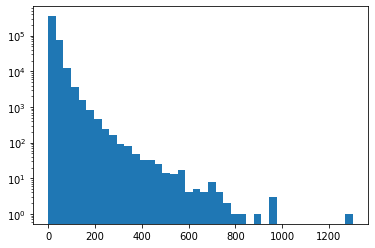

In [8]:
plt.hist(all_sent_lengths, bins=40, log=True)

## Separate sentences in commas as well

In [9]:
num_elabs_sepcomma = 0
num_sents_k_elab_sepcomma = Counter()
all_sent_lengths_sepcomma = []

for i in range(1, NUM_FILES+1):
    stats = parse_one_file(os.path.join(DATA_FOLDER, FNAME.format(i)), separate_comma=True)
    elabs_in_sent, sent_lengths = stats['elabs_in_sent'], stats['sent_lengths']
    num_elabs += sum(elabs_in_sent)
    cntr = Counter(elabs_in_sent)
    if 5 in cntr:
        print(i)
    num_sents_k_elab_sepcomma.update(cntr)

    all_sent_lengths_sepcomma.extend(sent_lengths)

3970
4026
4694
6504


In [10]:
print("number of sentences:", len(all_sent_lengths_sepcomma))
print("number of elaborate expressions:", num_elabs_sepcomma)
print("number of sentences with k EEs:", num_sents_k_elab_sepcomma)
print("average sent length:", sum(all_sent_lengths_sepcomma)/len(all_sent_lengths_sepcomma))
print("total number of tokens:", sum(all_sent_lengths_sepcomma))
all_sent_lengths_sepcomma.sort(reverse=True)

number of sentences: 776615
number of elaborate expressions: 0
number of sentences with k EEs: Counter({0: 753057, 1: 22141, 2: 1308, 3: 91, 4: 13, 5: 5})
average sent length: 14.66331579997811
total number of tokens: 11387751


In [11]:
percentile(all_sent_lengths_sepcomma, 10)

29

Even after separating by commas, some sentences in the corpus are extremely long (a few hundred words). They are due to sentence segmentation errors. But they are rare enough in the dataset that we can safely ignore them.

We can separate on a comma, then set max_len to 50 words. this will cover 98% of all the sentences.
(or set it to 36 words to cover 95% of all sentences for faster training.)



## Building a vocabulary

Some rules:
- lowercase all words
- if a word starts with a numeral, replace it with \<NUM>

In [13]:
def preproc_word(w):
    if w[0].isdigit():
        return 'NUM'
    else:
        return w.lower()

def word_freqs(path):
    # use untagged data folder
    with open(path) as f:
        lines = f.read().split('\n')
#     print(lines)
    words = Counter()

    for line in lines:
        if len(line) == 0: continue
        words[preproc_word(line)] += 1
    return words

In [14]:
all_words = Counter()
for i in range(1, NUM_FILES+1):
    all_words.update(word_freqs(os.path.join(UNTAGGED_DATA_FOLDER, FNAME.format(i))))

In [15]:
def vocab_size(min_count):
    return len([w for w, c in all_words.items() if c >= min_count])

def proportion_of_unk(min_count):
    return 1-sum([c for w, c in all_words.items() if c >= min_count])/sum(all_words.values())

for min_count in range(30):
    print(min_count, vocab_size(min_count), proportion_of_unk(min_count))

0 96130 0.0
1 96130 0.0
2 41611 0.0047875124772222
3 29078 0.006988649470821784
4 23406 0.008482886568208281
5 20070 0.009654671936539572
6 17768 0.010665407067646626
7 16053 0.011569009543675457
8 14796 0.012341681865014387
9 13784 0.013052621189205804
10 12935 0.01372360530187211
11 12225 0.014347082228966856
12 11613 0.014938243732234735
13 11091 0.015488308446505394
14 10643 0.015999735154026418
15 10259 0.016471821345584337
16 9894 0.016952601088660924
17 9558 0.017424687280218842
18 9232 0.01791135053795956
19 8959 0.01834286682243047
20 8725 0.018733286317904163
21 8496 0.019135472842706114
22 8293 0.019509822439918167
23 8108 0.019867224002351302
24 7923 0.020240871090349666
25 7762 0.020580183040531885
26 7586 0.020966563108027247
27 7424 0.02133643420900233
28 7267 0.021708676278573313
29 7114 0.022084869962471054


In [16]:
sum(all_words.values())

11387751

Can use a min_count of 10 when constructing the vocabulary.

Constructing the i2w and w2i lookup
And construct a file of sentence indices to be saved on disk

In [17]:
w2i = {'PAD': 0, 'UNK': 1, 'BOS': 2, 'EOS': 3}   
i2w = ['PAD', 'UNK', 'BOS', 'EOS']
# BOS may not be important in this dataset. EOS is important for batching in LSTM
for word, count in all_words.most_common():
    if count >= 10:
        w2i[word] = len(i2w)
        i2w.append(word)
        
l2i = {'PAD': 0, 'B': 3, 'I': 2, 'O': 1}
i2l = ['PAD', 'O', 'I', 'B']


In [18]:
def readin_one_file(path, separate_comma=True, max_sent_len=50, convert_to_idx=True):
    word_transform = preproc_word if convert_to_idx else lambda x: x
    tag_transform = l2i.get if convert_to_idx else lambda x: x
    
    with open(path) as f:
        lines = f.read().split('\n')
#     print(lines)
    sentences = [[]]
    tags = [[]]
    sep = 0  # if this reaches 2, it's a new sentence
    cur_sent_len = 0
    for line in lines:
        if len(line) > 0:
            word, tag = line.split('\t')
            if cur_sent_len < max_sent_len:
                sentences[-1].append(w2i.get(word_transform(word), w2i['UNK']))
                tags[-1].append(tag_transform(tag))
            cur_sent_len += 1
            if separate_comma and line[0] == ',':
                # start new sentence from this comma
                # new sentence
                if len(sentences[-1]) == 0:
                    print(line)
                sentences.append([])
                tags.append([])
                cur_sent_len = 0
                
        else:
            sep += 1
            if sep == 2:
                # new sentence
                sentences.append([])
                tags.append([])  
                cur_sent_len = 0
                sep = 0
                
    del sentences[-1]
    del tags[-1]
    assert len(sentences) == len(tags)
    return sentences, tags

In [19]:
# for character (phoneme features), generate phoneme representation of each syllable

c2i = {'PAD': 0, 'UNK': 1}
i2c = ['PAD', 'UNK']
wi2ci = {}

import sys
sys.path.append('..')
from libraries.hmong_rpa.rpa_regex import RPA_SYLLABLE as regex

def is_valid_syl(syl):
    m = regex.match(syl)
    if m:
        ons, rhy, ton = m.group("ons"), m.group("rhy"), m.group("ton")
        return ons + rhy + ton == syl
    return False

phonemes = set([])
for syl in w2i:
    m = regex.match(syl)
    if m:
        ons, rhy, ton = m.group("ons"), m.group("rhy"), m.group("ton")
        if ons + rhy + ton == syl:
            ## valid hmong syllable
            phonemes.add(f"ons_{ons}")
            phonemes.add(f"rhy_{rhy}")
            phonemes.add(f"ton_{ton}")

            
for c in sorted(phonemes):
    c2i[c] = len(i2c)
    i2c.append(c)
    
for syl in w2i:
    m = regex.match(syl)
    if m:
        ons, rhy, ton = m.group("ons"), m.group("rhy"), m.group("ton")
        if ons + rhy + ton == syl:
            ## valid hmong syllable
            wi2ci[w2i[syl]] = [c2i[f"ons_{ons}"], c2i[f"rhy_{rhy}"], c2i[f"ton_{ton}"]]


In [22]:
c2i

{'PAD': 0,
 'UNK': 1,
 'ons_': 2,
 'ons_c': 3,
 'ons_ch': 4,
 'ons_d': 5,
 'ons_dh': 6,
 'ons_dl': 7,
 'ons_dlh': 8,
 'ons_f': 9,
 'ons_h': 10,
 'ons_hl': 11,
 'ons_hm': 12,
 'ons_hml': 13,
 'ons_hn': 14,
 'ons_hny': 15,
 'ons_k': 16,
 'ons_kh': 17,
 'ons_l': 18,
 'ons_m': 19,
 'ons_ml': 20,
 'ons_n': 21,
 'ons_nc': 22,
 'ons_nch': 23,
 'ons_ndl': 24,
 'ons_nk': 25,
 'ons_nkh': 26,
 'ons_np': 27,
 'ons_nph': 28,
 'ons_npl': 29,
 'ons_nplh': 30,
 'ons_nq': 31,
 'ons_nqh': 32,
 'ons_nr': 33,
 'ons_nrh': 34,
 'ons_nt': 35,
 'ons_nth': 36,
 'ons_nts': 37,
 'ons_ntsh': 38,
 'ons_ntx': 39,
 'ons_ntxh': 40,
 'ons_ny': 41,
 'ons_p': 42,
 'ons_ph': 43,
 'ons_pl': 44,
 'ons_plh': 45,
 'ons_q': 46,
 'ons_qh': 47,
 'ons_r': 48,
 'ons_rh': 49,
 'ons_s': 50,
 'ons_t': 51,
 'ons_th': 52,
 'ons_ts': 53,
 'ons_tsh': 54,
 'ons_tx': 55,
 'ons_txh': 56,
 'ons_v': 57,
 'ons_x': 58,
 'ons_xy': 59,
 'ons_y': 60,
 'ons_z': 61,
 'rhy_a': 62,
 'rhy_aa': 63,
 'rhy_ai': 64,
 'rhy_au': 65,
 'rhy_aw': 66,
 'rhy_e':

In [23]:

data_sentences = {}
data_tags = {}
for i in range(1, NUM_FILES+1):
    sentences, tags = readin_one_file(os.path.join(DATA_FOLDER, FNAME.format(i)), separate_comma=True)
    for j, (s, t) in enumerate(zip(sentences, tags)):
        if len(s) > 0:
            identifier = f'{i:05d}-{j:04d}'
            data_sentences[identifier] = s
            if sum(t) > len(t):  # if B or I appear in the tags
                data_tags[identifier] = t


In [24]:
len(data_sentences)

776529

In [26]:
# import torch

# torch.save({'sentences': data_sentences, 'tags': data_tags,
#             'l2i': l2i, 'i2l': i2l, 'w2i': w2i, 'i2w': i2w,
#             'c2i': c2i, 'i2c': i2c, 'wi2ci': wi2ci}, '../data/hmong/data.pth')

In [27]:
len(data_tags.keys())

23234

## train/val/test split of elaborate expressions

### Naive Proportion Split
Partition all sentences without considering what EEs are tagged

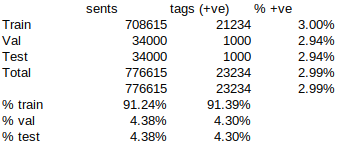




In [28]:
import random
num_datasets = 3

all_sent_ids = data_sentences.keys()
for n in range(num_datasets):
    positive_ids = list(data_tags.keys())
    negative_ids = list(all_sent_ids - data_tags.keys())
    
    random.shuffle(positive_ids)
    random.shuffle(negative_ids)

    val_split = set(positive_ids[:1000]) |  set(negative_ids[:34000])
    test_split = set(positive_ids[1000:2000]) |  set(negative_ids[34000:68000])
    train_split = set(positive_ids[2000:]) |  set(negative_ids[68000:])
    
    split = {'train': train_split, 'val': val_split, 'test': test_split}
    ## uncomment to save data
#     torch.save(split, f"../data/hmong/split_naive_{n+1}.pth")
    
    print(list(test_split)[:10])



['03092-0127', '05005-0153', '06268-0000', '07854-0001', '03750-0128', '01713-0231', '04984-0171', '03364-0025', '03570-0132', '05270-0102']
['00743-0152', '01585-0090', '02054-0136', '00036-0081', '08802-0082', '01855-0119', '07811-0085', '07935-0147', '01378-0010', '06518-0032']
['08751-0123', '03560-0150', '07472-0240', '01931-0082', '08048-0068', '00210-0158', '03421-0124', '00578-0013', '03364-0025', '03800-0024']


### Expression-aware tagging
first let's look at statistics of elaborate expressions in the corpus
then we divide sentence ids based on which EEs appear in them, so that training set and testing set consist of disjoint EEs.

In [29]:
def find_elabs_in_one_file(path, separate_comma=True):
    with open(path) as f:
        lines = f.read().split('\n')
#     print(lines)
    elabs = Counter()
    sep = 0  # if this reaches 2, it's a new sentence
    cur_elab = []
    for line in lines:
        if len(line) > 0 and line[-1] != 'O':
            if line[-1] == 'B':
                cur_elab = [line.split('\t')[0]]
            elif line[-1] == 'I':
                cur_elab.append(line.split('\t')[0])
            if len(cur_elab) == 4:
#                 print(cur_elab)
                elabs[tuple(cur_elab)] += 1
                
    return elabs

all_elabs = Counter()
for i in range(1, NUM_FILES+1):
    elabs_in_this_file = find_elabs_in_one_file(os.path.join(DATA_FOLDER, FNAME.format(i)), separate_comma=True)
    all_elabs.update(elabs_in_this_file)

In [30]:
all_elabs.most_common()

[(('tus', 'ub', 'tus', 'no'), 617),
 (('li', 'ub', 'li', 'no'), 600),
 (('rau', 'ub', 'rau', 'no'), 486),
 (('ua', 'nom', 'ua', 'tswv'), 389),
 (('coj', 'noj', 'coj', 'ua'), 358),
 (('me', 'tub', 'me', 'nyuam'), 276),
 (('muaj', 'noj', 'muaj', 'haus'), 230),
 (('txhua', 'leej', 'txhua', 'tus'), 224),
 (('muaj', 'teb', 'muaj', 'chaw'), 219),
 (('ua', 'dog', 'ua', 'dig'), 211),
 (('hais', 'ub', 'hais', 'no'), 194),
 (('ua', 'teb', 'ua', 'chaw'), 193),
 (('ua', 'noj', 'ua', 'haus'), 185),
 (('tim', 'ntsej', 'tim', 'muag'), 170),
 (('lwm', 'leej', 'lwm', 'tus'), 168),
 (('ua', 'pab', 'ua', 'pawg'), 154),
 (('kawm', 'txawj', 'kawm', 'ntse'), 151),
 (('kev', 'txawj', 'kev', 'ntse'), 147),
 (('tau', 'noj', 'tau', 'haus'), 147),
 (('lub', 'teb', 'lub', 'chaw'), 147),
 (('ua', 'hnub', 'ua', 'hmo'), 143),
 (('sib', 'ntaus', 'sib', 'tua'), 142),
 (('lub', 'koob', 'lub', 'npe'), 141),
 (('dag', 'noj', 'dag', 'haus'), 141),
 (('hav', 'zoov', 'hav', 'tsuag'), 139),
 (('sib', 'hlub', 'sib', 'pab'), 1

For each elaborate expression in all_elabs, have 91.39% chance of putting in the training set and 9% chance of putting in the val/test set

In [31]:
import random
random.seed(12)

num_datasets = 3
# these sets have EEs as elements
train_sets, valtest_sets = [set([]) for _ in range(num_datasets)], [set([]) for _ in range(num_datasets)]
train_count, valtest_count = [0]*num_datasets, [0]*num_datasets

for i in range(num_datasets):
    for elab, count in all_elabs.items():
        if random.random() > 0.9139:
            valtest_sets[i].add(elab)
            valtest_count[i] += count
        else:
            train_sets[i].add(elab)
            train_count[i] += count
            
print(valtest_count)
print(train_count)

[2089, 1966, 1964]
[23018, 23141, 23143]


In [32]:
print(valtest_count)

[2089, 1966, 1964]


In [33]:
random.seed(12)

def find_EEs(sentence, tag):
    EEs = []
    assert len(sentence) == len(tag)
    for token, a_tag in zip(sentence, tag):
        if a_tag == 'B':
            EEs.append([token])
        elif a_tag == 'I':
            EEs[-1].append(token)
    return EEs


# these sets have sentence id as elements
train_splits, val_splits, test_splits = [set([]) for _ in range(num_datasets)], [set([]) for _ in range(num_datasets)], [set([]) for _ in range(num_datasets)]

for i in range(1, NUM_FILES+1):
    sentences, tags = readin_one_file(os.path.join(DATA_FOLDER, FNAME.format(i)), 
                                      separate_comma=True, convert_to_idx=False)
    for j, (s, t) in enumerate(zip(sentences, tags)):
        identifier = f'{i:05d}-{j:04d}'
        if len(s) > 0:
            EEs_in_this_sentence = find_EEs(s, t)

            for n in range(num_datasets):
                if len(EEs_in_this_sentence) == 0: # this is a negative sentence
                    if random.random() > 0.9124:
                        if random.random() >= 0.5:
                            val_splits[n].add(identifier)
                        else:
                            test_splits[n].add(identifier)
                    else:
                        train_splits[n].add(identifier)
                else:  # this is a positive sentence
                    if all(tuple(map(i2w.__getitem__, ee)) in valtest_sets[n] for ee in EEs_in_this_sentence):
#                         print('add')
                        if random.random() >= 0.5:
                            val_splits[n].add(identifier)
                        else:
                            test_splits[n].add(identifier)
                    else:
                        train_splits[n].add(identifier)
                    
print([len(train) for train in train_splits])
print([len(val) for val in val_splits])
print([len(test) for test in test_splits])


[708765, 709027, 708744]
[33705, 33593, 33949]
[34059, 33909, 33836]


In [34]:
random.seed(12)
for n in range(num_datasets):
    # Partition the grouped splits into 50% swap and 50% keep
    train_elabs = list(train_sets[n])
    valtest_elabs = list(valtest_sets[n])
    random.shuffle(train_elabs)
    random.shuffle(valtest_elabs)

    train_elabs_swap = train_elabs[:len(train_elabs)//2]
    train_elabs_keep = train_elabs[len(train_elabs)//2:]
    valtest_elabs_swap = valtest_elabs[:len(valtest_elabs)//2]
    valtest_elabs_keep = valtest_elabs[len(valtest_elabs)//2:]
    
    split = {'train': train_splits[n], 'val': val_splits[n], 'test': test_splits[n],
            'train_elabs': train_sets[n], 'valtest_elabs': valtest_sets[n],
            'train_elabs_swap': train_elabs_swap,
            'train_elabs_keep': train_elabs_keep,
            'valtest_elabs_swap': valtest_elabs_swap,
            'valtest_elabs_keep': valtest_elabs_keep,
            }
    # uncomment to save
#     torch.save(split, f"../data/hmong/split_grouped_{n+1}.pth")
    

In [35]:
i2l

['PAD', 'O', 'I', 'B']

What's the least frequent word that also occurs in an extracted EE?
--
some words occur 3, 5, 6, 7 times in the corpus, but using the min count=10 cut off should still be fine.

In [36]:
df = pd.read_csv("../data/hmong/extracted_elabs/elabs_extracted.csv", sep=',', quoting=1)

In [37]:
syllables = set([])
syllables = syllables.union(df['word1'].tolist()).union(df['word2'].tolist()).union(df['word4'].tolist())
syllables.remove('ntusag')

In [38]:
sorted((all_words[syl], syl) for syl in syllables)

[(3, 'chiaj'),
 (5, 'dloj'),
 (6, 'viag'),
 (7, 'dhiab'),
 (10, 'ncis'),
 (10, 'nqhe'),
 (11, 'doj'),
 (11, 'hnias'),
 (12, 'ncaab'),
 (12, 'txee'),
 (12, 'txoo'),
 (15, 'nkuas'),
 (15, 'nrus'),
 (16, 'ntxho'),
 (16, 'thaws'),
 (18, 'ndlog'),
 (18, 'nrhaav'),
 (18, 'ntxhis'),
 (19, 'ncoj'),
 (20, 'npu'),
 (20, 'vuam'),
 (21, 'daub'),
 (21, 'dlaus'),
 (21, 'mij'),
 (21, 'pwj'),
 (21, 'qag'),
 (22, 'nplo'),
 (22, 'ntxua'),
 (23, 'npooj'),
 (23, 'nrhaw'),
 (24, 'nkib'),
 (24, 'sos'),
 (24, 'vaus'),
 (25, 'hlev'),
 (25, 'zuas'),
 (26, 'plaag'),
 (26, 'yoos'),
 (27, 'yoom'),
 (28, 'chab'),
 (31, 'npws'),
 (32, 'nrw'),
 (32, 'ntsoj'),
 (33, 'tshuv'),
 (33, 'vis'),
 (34, 'ntaim'),
 (35, 'caa'),
 (36, 'npaim'),
 (36, 'tshoom'),
 (37, 'ncawg'),
 (38, 'nkhib'),
 (39, 'hlas'),
 (40, 'dlawm'),
 (40, 'hnyuv'),
 (41, 'ntswb'),
 (41, 'plawm'),
 (43, 'nqaum'),
 (43, 'ntee'),
 (44, 'qij'),
 (44, 'thum'),
 (50, 'plas'),
 (51, 'ruj'),
 (52, 'txhiam'),
 (53, 'leev'),
 (53, 'ndlav'),
 (53, 'plhaw'),
 (53, 

## Partition the grouped splits into 50% swap and 50% keep

In [40]:
import torch

In [41]:
data = torch.load('../data/hmong/data.pth')
split = torch.load('../data/hmong/split_grouped_1.pth')

val_split = split['train']
val_sentences = {idx: data['sentences'][idx] for idx in val_split}
val_tags = {idx: data['tags'][idx] for idx in val_split if idx in data['tags']}

In [42]:
for (idx, tag) in val_tags.items():
    # positive sentences here
    sentence = val_sentences[idx]
    begin = tag.index(l2i['B'])
    ee_i = sentence[begin:begin+4]
    ee_w = list(map(i2w.__getitem__, ee_i))
    if len(ee_w) < 4:
        print(ee_w, 'incomplete')
        continue
    ee_in_val_elabs = tuple(ee_w) in valtest_sets[0]
    ee_in_train_elabs = tuple(ee_w) in train_sets[0]
    print('ee is in val_elabs: ', ee_in_val_elabs, 'in train_elabs', ee_in_train_elabs)
    if not (ee_in_val_elabs or ee_in_train_elabs):
        print(ee_w, 'not in either')

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  True in train_elabs False
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  True in train_elabs False
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_

ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_elabs:  False in train_elabs True
ee is in val_